# CS224W Project Exploratory Data Analysis
### If You Can Make it Through Gridlock Here, You Can Make it Through Gridlock Anywhere: Using Graph Neural Networks to Predict New York City Traffic

Charles Shaviro, Yi-Ting Tsai, Leda Liang

EDA:
* get a sense of the distribution of speed by plotting some histograms
* some experiment on the dis

Load the preprocessed data from processed_data/data_clean

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CS224W_Final_Project/processed_data/data_clean.csv')

In [ ]:
data.head()

,sensor,2024-09-01 00:00,2024-09-01 00:05,2024-09-01 00:10,2024-09-01 00:15,2024-09-01 00:20,2024-09-01 00:25,2024-09-01 00:30,2024-09-01 00:35,2024-09-01 00:40,...,2024-10-31 23:10,2024-10-31 23:15,2024-10-31 23:20,2024-10-31 23:25,2024-10-31 23:30,2024-10-31 23:35,2024-10-31 23:40,2024-10-31 23:45,2024-10-31 23:50,2024-10-31 23:55
0,"40.608031,-74.13212",50.95,50.33,48.46,54.68,53.43,50.33,47.22,51.57,55.3,...,49.7,50.33,48.46,49.08,47.22,52.81,42.25,49.08,52.81,52.81
1,"40.60759,-74.1409",50.95,50.33,48.46,54.68,53.43,50.33,47.22,51.57,55.3,...,49.7,50.33,48.46,49.08,47.22,52.81,42.25,49.08,52.81,52.81
2,"40.61486,-74.15738",50.95,50.33,48.46,54.68,53.43,50.33,47.22,51.57,55.3,...,49.7,50.33,48.46,49.08,47.22,52.81,42.25,49.08,52.81,52.81
3,"40.60931,-74.15012",50.95,50.33,48.46,54.68,53.43,50.33,47.22,51.57,55.3,...,49.7,50.33,48.46,49.08,47.22,52.81,42.25,49.08,52.81,52.81
4,"40.60846,-74.14847",50.95,50.33,48.46,54.68,53.43,50.33,47.22,51.57,55.3,...,49.7,50.33,48.46,49.08,47.22,52.81,42.25,49.08,52.81,52.81


In [ ]:
data["sensor"].nunique()

1066

In [ ]:
len(data)

1066

Plot a histogram of all average speeds in the data

In [ ]:
import matplotlib.pyplot as plt

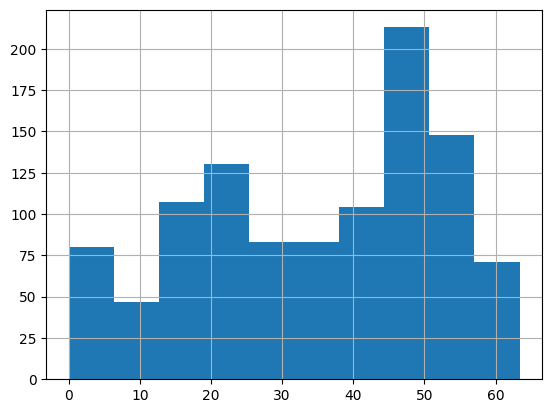

In [ ]:
# data_for_histogram = data.drop(columns=["sensor"]) # don't run this, takes forever
data_for_histogram = data["2024-09-01 17:10"]


data_for_histogram.hist()
plt.show()

# Creating Graph

In [ ]:
data["sensor"].dtype

dtype('O')

In [ ]:
data["sensor"]

,sensor
0,"40.608031,-74.13212"
1,"40.60759,-74.1409"
2,"40.61486,-74.15738"
3,"40.60931,-74.15012"
4,"40.60846,-74.14847"
...,...
1061,"40.8448604,-73.92471"
1062,"40.84488,-73.92327"
1063,"40.8451305,-73.91885"
1064,"40.8452706,-73.913131"


In [ ]:
import networkx as nx
import numpy as np

Remove all rows where the location of the sensor is not approximately 40, -74

In [ ]:
ys = []

for i in range(len(data)):
  y = data["sensor"][i].split(",")[1]
  ys.append(float(y))

ys = np.array(ys)

In [ ]:
data.drop(data[np.abs(ys + 74) > 0.5].index, inplace=True)
# new_data = data[np.abs(ys + 74) < 1]
# len(new_data)

# data = new_data
data.head()

,sensor,2024-09-01 00:00,2024-09-01 00:05,2024-09-01 00:10,2024-09-01 00:15,2024-09-01 00:20,2024-09-01 00:25,2024-09-01 00:30,2024-09-01 00:35,2024-09-01 00:40,...,2024-10-31 23:10,2024-10-31 23:15,2024-10-31 23:20,2024-10-31 23:25,2024-10-31 23:30,2024-10-31 23:35,2024-10-31 23:40,2024-10-31 23:45,2024-10-31 23:50,2024-10-31 23:55
0,"40.608031,-74.13212",50.95,50.33,48.46,54.68,53.43,50.33,47.22,51.57,55.3,...,49.7,50.33,48.46,49.08,47.22,52.81,42.25,49.08,52.81,52.81
1,"40.60759,-74.1409",50.95,50.33,48.46,54.68,53.43,50.33,47.22,51.57,55.3,...,49.7,50.33,48.46,49.08,47.22,52.81,42.25,49.08,52.81,52.81
2,"40.61486,-74.15738",50.95,50.33,48.46,54.68,53.43,50.33,47.22,51.57,55.3,...,49.7,50.33,48.46,49.08,47.22,52.81,42.25,49.08,52.81,52.81
3,"40.60931,-74.15012",50.95,50.33,48.46,54.68,53.43,50.33,47.22,51.57,55.3,...,49.7,50.33,48.46,49.08,47.22,52.81,42.25,49.08,52.81,52.81
4,"40.60846,-74.14847",50.95,50.33,48.46,54.68,53.43,50.33,47.22,51.57,55.3,...,49.7,50.33,48.46,49.08,47.22,52.81,42.25,49.08,52.81,52.81


In [ ]:
sensor_network = nx.Graph()

n = len(data)
for i in data.index:
  x, y = data["sensor"][i].split(",")
  sensor_network.add_node(i, x=x, y=y)


In [ ]:
sensor_network.number_of_nodes()

1053

In [ ]:
sensor_dists = []
indices = []

# Use data.index to iterate over the actual indices present in the filtered DataFrame
for i in data.index:
  x1, y1 = data.loc[i, "sensor"].split(",")  # Access using .loc
  for j in data.index[data.index > i]: # Iterate over valid j values
    # compute distance
    x2, y2 = data.loc[j, "sensor"].split(",")  # Access using .loc

    dist = np.sqrt((float(x1) - float(x2))**2 + (float(y1) - float(y2))**2)
    sensor_dists.append(dist)
    indices.append((i, j))

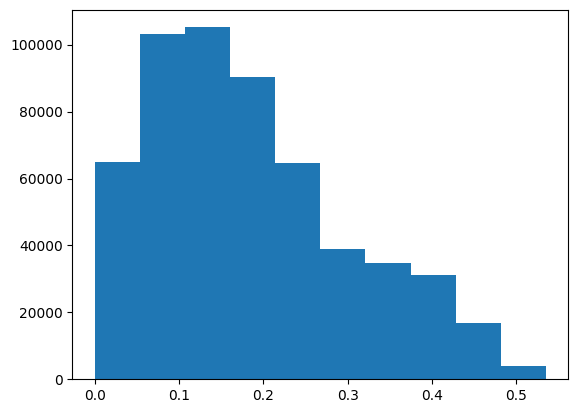

In [ ]:
plt.hist(sensor_dists)
plt.show()

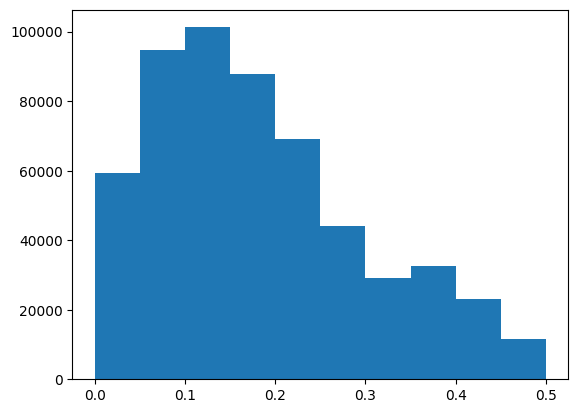

In [ ]:
plt.hist(np.array(sensor_dists)[np.array(sensor_dists) < 0.5])
plt.show()

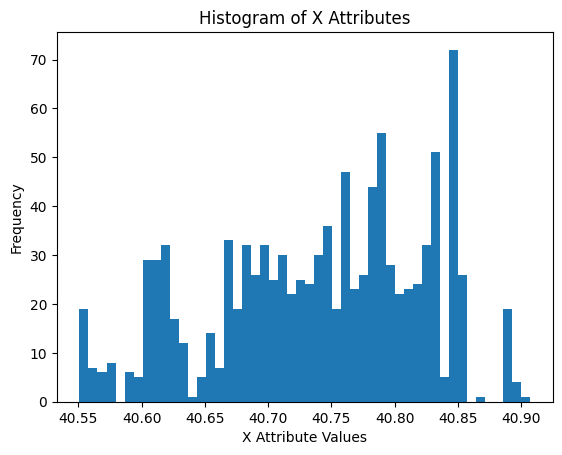

In [ ]:
# Get a list of all x attributes
x_values = [sensor_network.nodes[node]['x'] for node in sensor_network.nodes()]

# Convert x_values to floats since they're strings:
x_values = [float(x) for x in x_values]

# Create the histogram
plt.hist(x_values, bins=50)
plt.xlabel("X Attribute Values")
plt.ylabel("Frequency")
plt.title("Histogram of X Attributes")
plt.show()

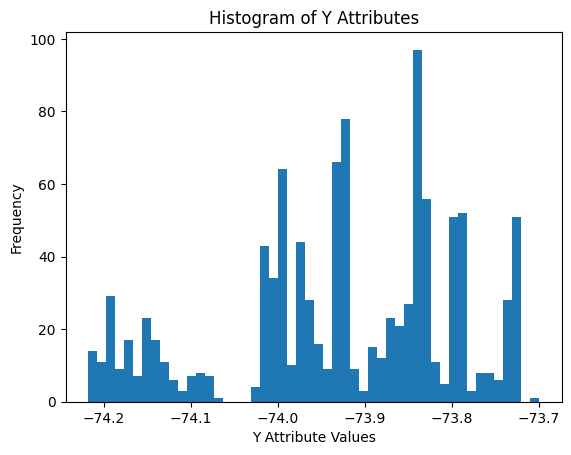

In [ ]:
# Get a list of all y attributes
y_values = [sensor_network.nodes[node]['y'] for node in sensor_network.nodes()]

# Convert y_values to floats since they're strings:
y_values = [float(y) for y in y_values]

# Create the histogram
plt.hist(y_values, bins=50)
plt.xlabel("Y Attribute Values")
plt.ylabel("Frequency")
plt.title("Histogram of Y Attributes")
plt.show()

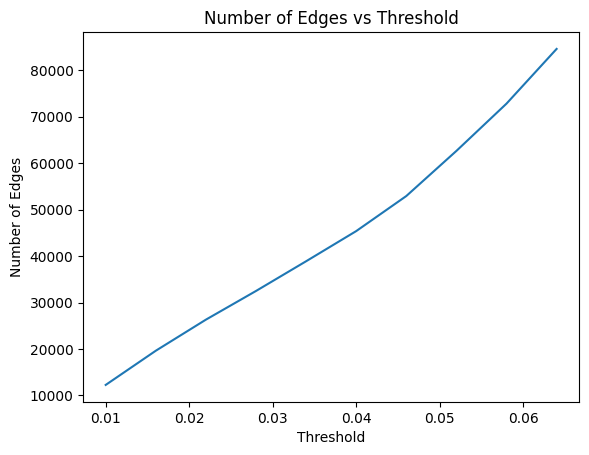

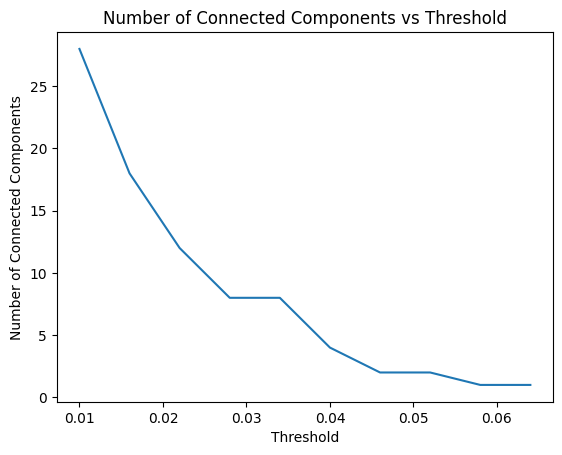

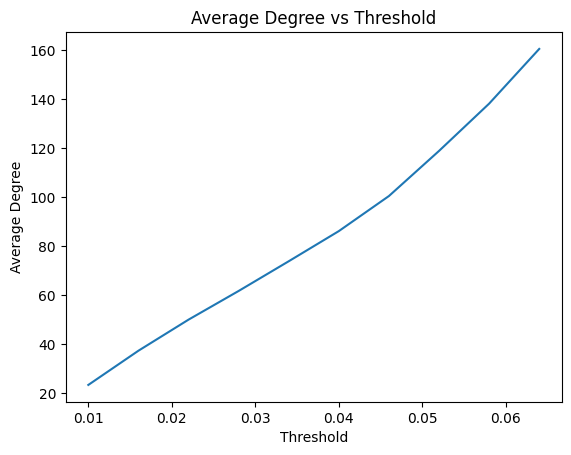

[0.01  0.016 0.022 0.028 0.034 0.04  0.046 0.052 0.058 0.064]
[28, 18, 12, 8, 8, 4, 2, 2, 1, 1]


In [ ]:
# plot of how number of edges decays

num_edges = []
num_connected_components = []
average_degrees = []
grid = np.linspace(0.01, 0.064, 10)

for i in grid:
  num_edges.append(np.sum(np.array(sensor_dists) < i))

  sensor_network_temp = nx.Graph()

  n = len(data)
  for j in data.index:
    x, y = data["sensor"][j].split(",")
    sensor_network_temp.add_node(j, x=x, y=y)

  for j in np.where(np.array(sensor_dists) < i)[0]:
    sensor_network_temp.add_edge(indices[j][0], indices[j][1])

  num_connected_components.append(nx.number_connected_components(sensor_network_temp))
  average_degrees.append(np.mean(list(dict(sensor_network_temp.degree()).values())))



plt.plot(grid, num_edges)
plt.title("Number of Edges vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Number of Edges")
plt.show()
plt.plot(grid, num_connected_components)
plt.title("Number of Connected Components vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Number of Connected Components")
plt.show()
plt.plot(grid, average_degrees)
plt.title("Average Degree vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Average Degree")
plt.show()
print(grid)
print(num_connected_components)

It would be best to have the minimum number of edges so that the network has one connected component


Looks like we should choose our threshold as 0.058

In [ ]:
threshold = 0.058
np.sum(np.array(sensor_dists) < threshold)

72776

In [ ]:
for i in np.where(np.array(sensor_dists) < threshold)[0]:
  sensor_network.add_edge(indices[i][0], indices[i][1])


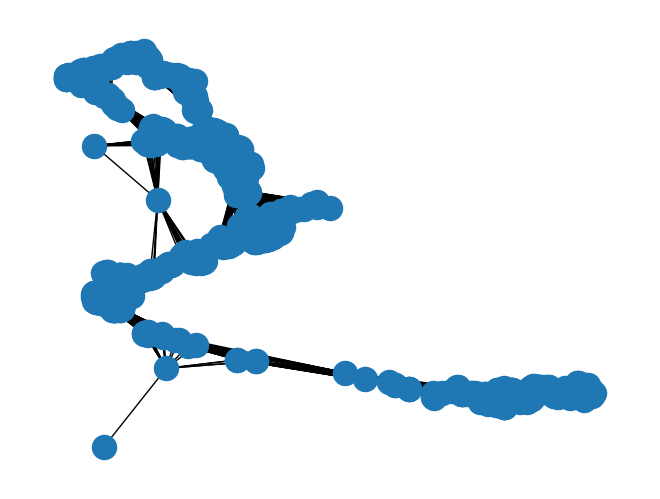

In [ ]:
nx.draw(sensor_network)

In [ ]:
sensor_network.number_of_nodes()

1053

In [ ]:
sensor_network.number_of_edges()

72776

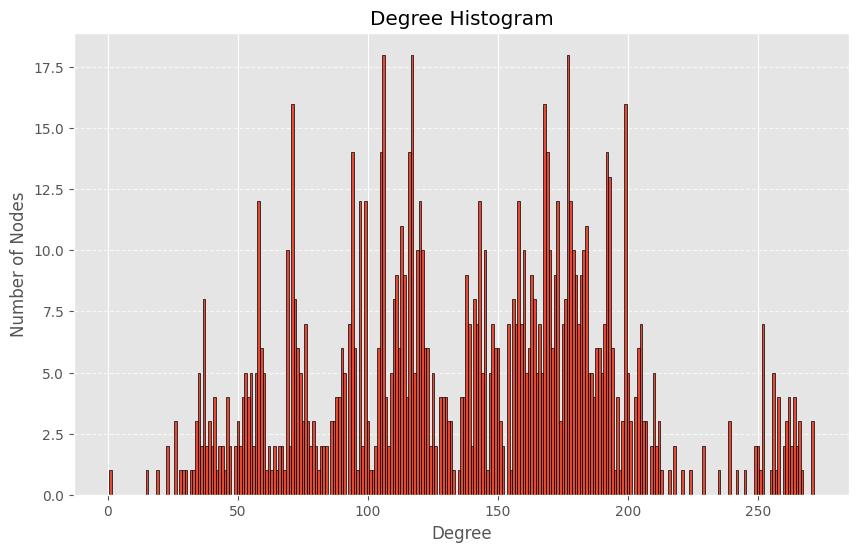

In [ ]:
degrees = [deg for _, deg in sensor_network.degree()]

# Set the style for better aesthetics (optional)
plt.style.use('ggplot')

# Create the histogram
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2), edgecolor='black', align='left')

# Add titles and labels
plt.title('Degree Histogram')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')

# Optionally, add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [ ]:
nx.write_gml(sensor_network, "sensor_network.gml")

# Load networkx graph

In [ ]:
loaded_graph = nx.read_gml("sensor_network.gml")

In [ ]:
loaded_graph.number_of_nodes()

1053